In [41]:
token = "a7b20814aa27b1ecf85bfacae132d709caa7f3dd2c7094201eae04445c957eaabdcb32f6f912a1ab6f118bc34cb207752cccaa8bf22367680eb4824b19fa8f7d"
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum", # `channel` distinguishes between different account types
  overwrite=True,
)
# Load saved credentials
# service = QiskitRuntimeService()

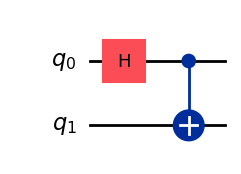

In [42]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [43]:
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]


In [44]:
# Use the following code instead if you want to run on a simulator:
 
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()
estimator = Estimator(backend)
 
# Convert to an ISA circuit and layout-mapped observables.
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]

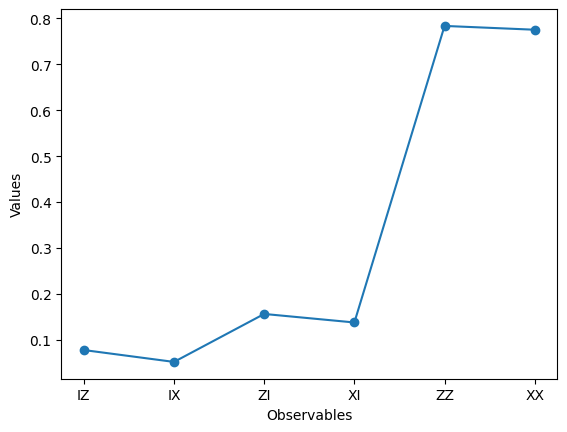

In [45]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

Measurement Results: {'11': 525, '00': 499}


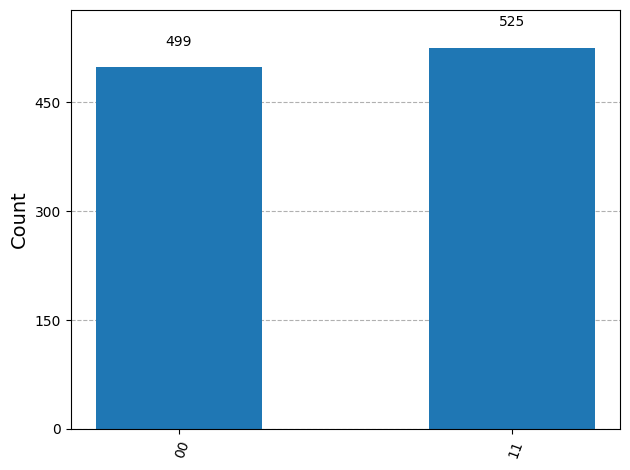

In [46]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT gate (qubit 0 as control, qubit 1 as target)
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()

# Display results
print("Measurement Results:", counts)
plot_histogram(counts)

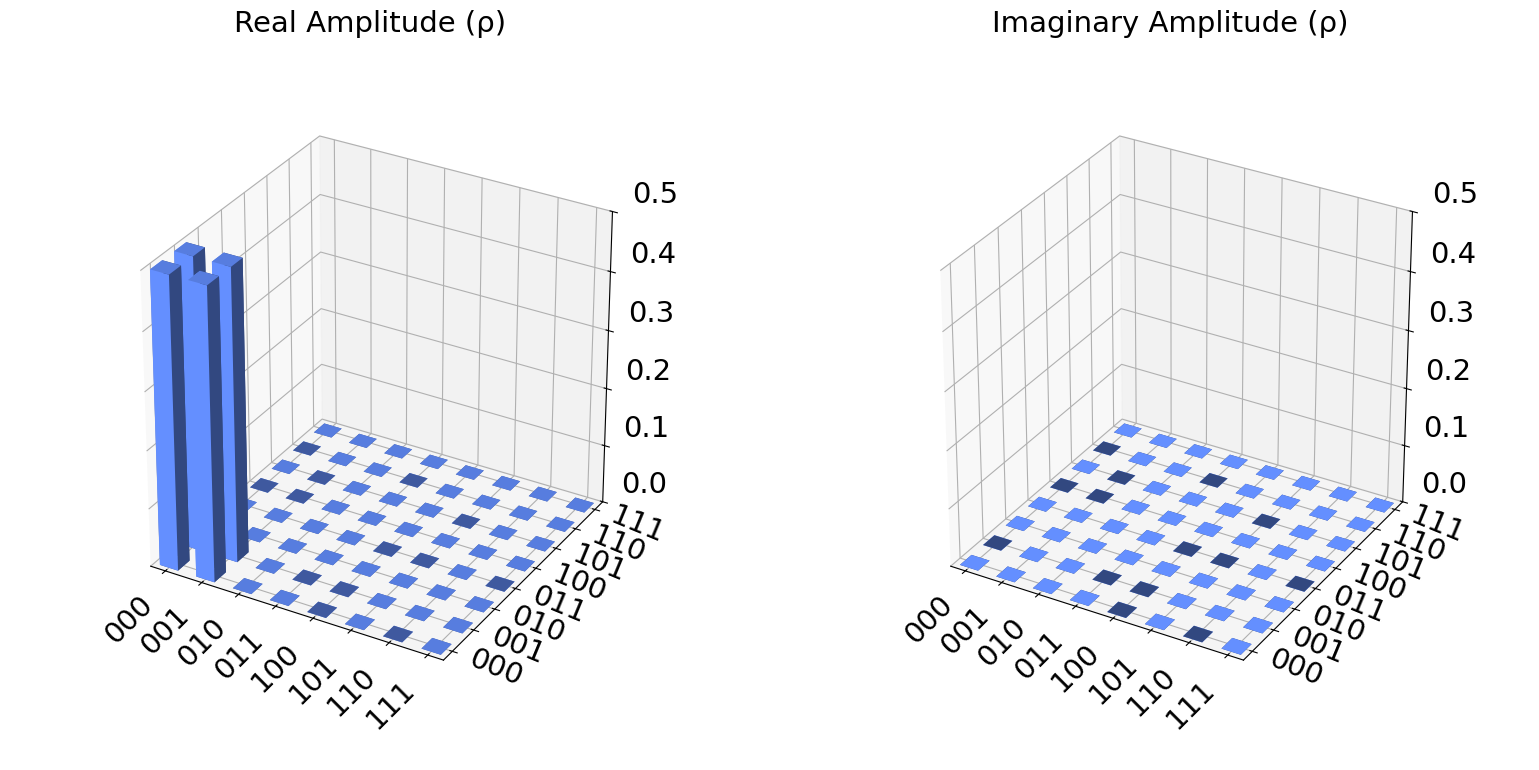

In [47]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import DensityMatrix

qubit = QuantumRegister(3, name='qubit')
meas_data = ClassicalRegister(2, name='meas_data')
qc = QuantumCircuit(qubit, meas_data)
random_state = [0.5, 0.5]
# qc.initialize(random_state, qubit[0])
qc.h(qubit[0])
density_mat = DensityMatrix(qc)
density_mat.draw('city')


In [66]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile

qubit = QuantumRegister(3, name='qubit')
# meas_data = ClassicalRegister(2, name='meas_data')
qc = QuantumCircuit(qubit)
qc.h(qubit[0])
qc.h(qubit[1])
qc.ccx(qubit[0], qubit[1], qubit[2])
qc.s(qubit[2])
qc.ccx(qubit[0], qubit[1], qubit[2])
qc.h(qubit[0])
qc.h(qubit[1])
qc.measure_all()
# qc.measure(qubit[0], meas_data[0])
# qc.measure(qubit[1], meas_data[1])
# with qc.if_test((meas_data[0], 0)):
#     qc.x(qubit[2])
# qc.measure(qubit[2], meas_data[2])
# qc.measure(qubit[0], meas_data[0])
# qc.measure(qubit[1], meas_data[1])
qc.draw()

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()
# Display results
print("Measurement Results:", counts)



Measurement Results: {'001': 121, '010': 150, '011': 112, '000': 641}


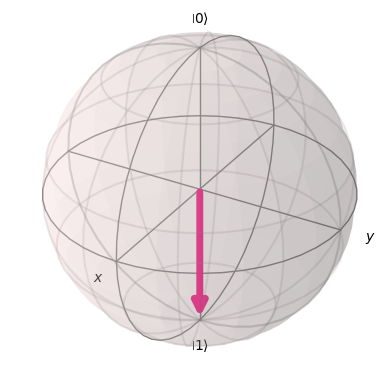

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector

# Create a 1-qubit circuit
qc = QuantumCircuit(1)
# qc.x(0)  # Initialize to |1⟩
qc.h(0)
qc.rx(np.pi / 2, 0)
qc.h(0)
qc.rz(-np.pi / 2, 0)
qc.s(0)

# Get final statevector
state = Statevector.from_instruction(qc)
a, b = state.data  # state = a|0⟩ + b|1⟩

# Compute Bloch vector components
x = 2 * np.real(np.conj(a) * b)
y = 2 * np.imag(np.conj(b) * a)
z = np.abs(a)**2 - np.abs(b)**2
bloch_vec = np.array([x, y, z])

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
plot_bloch_vector(bloch_vec, ax=ax)
plt.show()

In [36]:
import numpy as np
from qiskit.quantum_info import DensityMatrix, partial_trace

# Define the maximally mixed 2-qubit state: (1/4) * I_4
rho = DensityMatrix(np.eye(4) / 4)

# Take the partial trace over the second qubit (index 1)
rho_reduced = partial_trace(rho, [1])  # trace out qubit 1

# Print the result
print("Reduced density matrix (after tracing out qubit 2):")
print(rho_reduced)

Reduced density matrix (after tracing out qubit 2):
DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [67]:
import numpy as np

# Define the Hermitian matrix
A = np.array([[2, 1j], [-1j, 3]])

# Eigen-decomposition
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Diagonal matrix D
D = np.diag(eigenvalues)

# Unitary matrix U (columns are eigenvectors)
U = eigenvectors

# Verify: A = U D U†
A_reconstructed = U @ D @ U.conj().T

print("Eigenvalues (D):")
print(D)

print("\nEigenvectors (columns of U):")
print(U)

print("\nReconstructed A:")
print(A_reconstructed)

Eigenvalues (D):
[[1.38196601 0.        ]
 [0.         3.61803399]]

Eigenvectors (columns of U):
[[-0.85065081-0.j         -0.52573111+0.j        ]
 [ 0.        -0.52573111j  0.        +0.85065081j]]

Reconstructed A:
[[2.+0.j 0.+1.j]
 [0.-1.j 3.+0.j]]


In [81]:
qubit = QuantumRegister(2, name='qubit')
meas_data = ClassicalRegister(2, name='meas_data')
# qc = QuantumCircuit(qubit)
qc = QuantumCircuit(qubit, meas_data)
# qc.h(qubit[0])
# qc.cx(qubit[0], qubit[1])
# qc.measure_all()
qc.h(qubit[0])
qc.measure(qubit[0], meas_data[0])
with qc.if_test((meas_data[0], 1)):
    qc.x(qubit[1])

qc.draw("mpl")

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()
# Display results
print("Measurement Results:", counts)


Measurement Results: {'00': 511, '01': 513}
